In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_raw = pd.read_excel('data/Online Retail.xlsx')


In [4]:
print("Data Shape:", df_raw.shape)
print("\nData Info:")
df_raw.info()
df_raw.head()


Data Shape: (541909, 8)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
# --- Handle Missing Values ---
# We will focus on transactions with a CustomerID for our analysis.
df = df_raw.dropna(subset=['CustomerID'])
print(f"Shape after dropping null CustomerIDs: {df.shape}")

# --- Remove Duplicates ---
df = df.drop_duplicates()
print(f"Shape after dropping duplicates: {df.shape}")

# --- Handle Cancellations & Returns ---
# Filter out invoices starting with 'C' and quantities less than or equal to 0.
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
df = df[df['Quantity'] > 0]
print(f"Shape after removing cancellations/returns: {df.shape}")

# --- Handle Zero Unit Price ---
# These are likely promotional items or data errors and can skew analysis.
df = df[df['UnitPrice'] > 0]
print(f"Shape after removing zero unit price items: {df.shape}")

# --- Convert CustomerID to integer for cleaner processing ---
# Now that NaNs are gone, we can safely convert to int.
df['CustomerID'] = df['CustomerID'].astype(int)

# --- Final Cleaned Data Check ---
print("\n--- Final Cleaned Data ---")
df.info()
print("\n--- First 5 Rows of Cleaned Data ---")
display(df.head())

Shape after dropping null CustomerIDs: (406829, 8)
Shape after dropping duplicates: (401604, 8)
Shape after removing cancellations/returns: (392732, 8)
Shape after removing zero unit price items: (392692, 8)

--- Final Cleaned Data ---
<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int32         
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 25.5+ MB

--- First 5 Rows of Cleaned Data ---


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


# ABC Analysis

TotalPrice column created successfully.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34



--- Top 10 'A' Products by Revenue ---


,StockCode,TotalPrice,CumulativeRevenue,CumulativePercentage,Category
2329,23843,168469.60,168469.60,1.895641,A
1218,22423,142264.75,310734.35,3.496422,A
3349,85123A,100547.45,411281.80,4.627795,A
3343,85099B,85040.54,496322.34,5.584682,A
1927,23166,81416.73,577739.07,6.500793,A
3664,POST,77803.96,655543.03,7.376253,A
2406,47566,68785.23,724328.26,8.150233,A
2602,84879,56413.03,780741.29,8.785000,A
3662,M,53419.93,834161.22,9.386088,A
1849,23084,51251.24,885412.46,9.962773,A



--- Product Count by Category ---
Category
C    1968
B     922
A     775
Name: count, dtype: int64


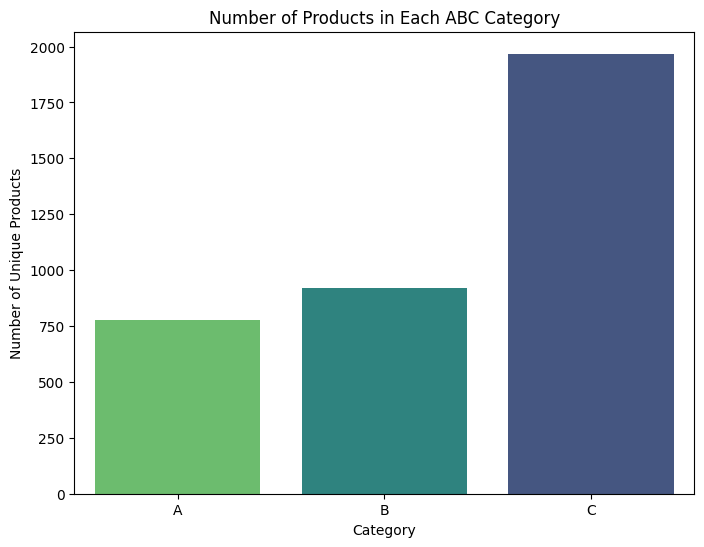

In [7]:
# --- Feature Engineering: Create TotalPrice ---
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
print("TotalPrice column created successfully.")
display(df.head())


# --- ABC Analysis Calculation ---
# 1. Calculate revenue per product
product_revenue = df.groupby('StockCode')['TotalPrice'].sum().reset_index()

# 2. Sort products by revenue in descending order
product_revenue = product_revenue.sort_values(by='TotalPrice', ascending=False)

# 3. Calculate cumulative revenue and percentage
product_revenue['CumulativeRevenue'] = product_revenue['TotalPrice'].cumsum()
total_revenue = product_revenue['TotalPrice'].sum()
product_revenue['CumulativePercentage'] = (product_revenue['CumulativeRevenue'] / total_revenue) * 100

# 4. Assign ABC Categories based on cumulative percentage
def assign_abc_category(percentage):
    if percentage <= 80:
        return 'A'  # Top 80% of revenue
    elif 80 < percentage <= 95:
        return 'B'  # Next 15% of revenue
    else:
        return 'C'  # Final 5% of revenue

product_revenue['Category'] = product_revenue['CumulativePercentage'].apply(assign_abc_category)

print("\n--- Top 10 'A' Products by Revenue ---")
display(product_revenue.head(10))

# --- Visualize the ABC Categories ---
print("\n--- Product Count by Category ---")
category_counts = product_revenue['Category'].value_counts()
print(category_counts)

plt.figure(figsize=(8, 6))
sns.barplot(data=category_counts.reset_index(), x='Category', y='count', hue='Category', palette='viridis', order=['A', 'B', 'C'], legend=False)
plt.title('Number of Products in Each ABC Category')
plt.xlabel('Category')
plt.ylabel('Number of Unique Products')
plt.show()

In [8]:
# --- RFM Analysis Calculation ---

# To calculate Recency, we need a snapshot date. We'll use the day after the last transaction.
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)
print(f"Snapshot date for RFM analysis: {snapshot_date}")

# 1. Calculate Recency, Frequency, and Monetary Value for each customer
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda date: (snapshot_date - date.max()).days, # Recency
    'InvoiceNo': 'nunique',                                         # Frequency
    'TotalPrice': 'sum'                                             # Monetary
}).reset_index()

# Rename columns for clarity
rfm.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalPrice': 'MonetaryValue'}, inplace=True)

print("\n--- Raw RFM Values (Top 5 Customers) ---")
display(rfm.head())

# 2. Create RFM Scores using Quantiles (from 1 to 4)
# Lower Recency is better (more recent), so we invert the labels
r_labels = range(4, 0, -1) 
f_labels = range(1, 5)
m_labels = range(1, 5)

# Assign scores
rfm['R_Score'] = pd.qcut(rfm['Recency'], q=4, labels=r_labels, duplicates='drop')
# Use rank(method='first') to handle duplicate values in Frequency, which is common
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), q=4, labels=f_labels)
rfm['M_Score'] = pd.qcut(rfm['MonetaryValue'], q=4, labels=m_labels)

# 3. Combine scores
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

print("\n--- RFM Scores (Top 5 Customers) ---")
display(rfm.head())

# Let's identify our best customers (score of 12 is max)
print(f"\nNumber of 'Best Customers' (RFM Score = 12): {rfm[rfm['RFM_Score'] == 12].shape[0]}")

Snapshot date for RFM analysis: 2011-12-10 12:50:00

--- Raw RFM Values (Top 5 Customers) ---


,CustomerID,Recency,Frequency,MonetaryValue
0,12346,326,1,77183.60
1,12347,2,7,4310.00
2,12348,75,4,1797.24
3,12349,19,1,1757.55
4,12350,310,1,334.40



--- RFM Scores (Top 5 Customers) ---


,CustomerID,Recency,Frequency,MonetaryValue,R_Score,F_Score,M_Score,RFM_Score
0,12346,326,1,77183.60,1,1,4,6
1,12347,2,7,4310.00,4,4,4,12
2,12348,75,4,1797.24,2,3,4,9
3,12349,19,1,1757.55,3,1,4,8
4,12350,310,1,334.40,1,1,2,4



Number of 'Best Customers' (RFM Score = 12): 489


In [9]:
# Calculate the monetary contribution of 'Best Customers'
total_monetary_value = rfm['MonetaryValue'].sum()
best_customers_monetary_value = rfm[rfm['RFM_Score'] == 12]['MonetaryValue'].sum()

percentage_revenue_from_best = (best_customers_monetary_value / total_monetary_value) * 100

print(f"Total revenue from all customers: ${total_monetary_value:,.2f}")
print(f"Revenue from Best Customers: ${best_customers_monetary_value:,.2f}")
print(f"Percentage of total revenue from Best Customers: {percentage_revenue_from_best:.2f}%")

Total revenue from all customers: $8,887,208.89
Revenue from Best Customers: $4,424,373.61
Percentage of total revenue from Best Customers: 49.78%


--- Preparing time series for StockCode: 22423 ---
Total transactions for this product: 1713

--- Daily Sales Time Series (Last 10 Days) ---


InvoiceDate
2011-11-30     29
2011-12-01     32
2011-12-02     15
2011-12-03      0
2011-12-04     10
2011-12-05     33
2011-12-06    146
2011-12-07    130
2011-12-08     15
2011-12-09     10
Freq: D, Name: Quantity, dtype: int64

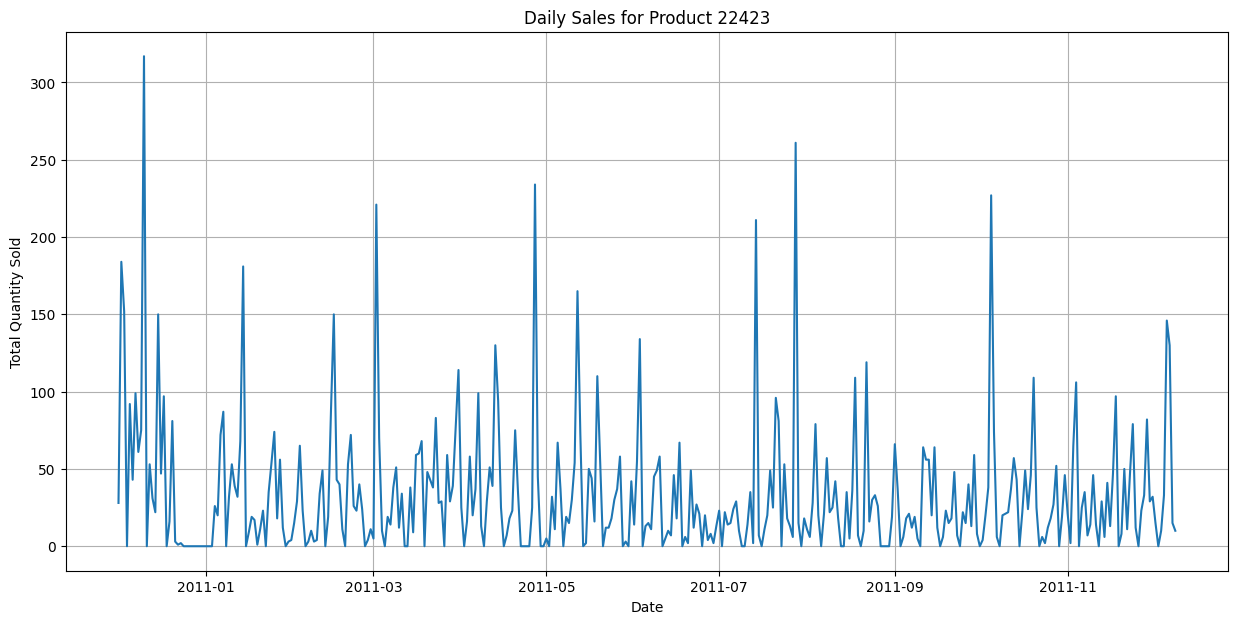

In [42]:
# --- Forecasting Prep ---

# 1. Select a top 'A' product to forecast
PRODUCT_TO_FORECAST = '22423'
product_sales = df[df['StockCode'] == PRODUCT_TO_FORECAST]

print(f"--- Preparing time series for StockCode: {PRODUCT_TO_FORECAST} ---")
print(f"Total transactions for this product: {len(product_sales)}")

# 2. Aggregate sales data into a daily time series
# We set InvoiceDate as the index and resample to 'D' (daily), summing the Quantity.
ts_daily = product_sales.set_index('InvoiceDate')['Quantity'].resample('D').sum().fillna(0)

print("\n--- Daily Sales Time Series (Last 10 Days) ---")
display(ts_daily.tail(10))

# 3. Visualize the time series
plt.figure(figsize=(15, 7))
plt.plot(ts_daily)
plt.title(f'Daily Sales for Product {PRODUCT_TO_FORECAST}')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.grid(True)
plt.show()

Training data runs from 2010-12-01 00:00:00 to 2011-10-10 00:00:00
Testing data runs from 2011-10-11 00:00:00 to 2011-12-09 00:00:00

Model training complete.


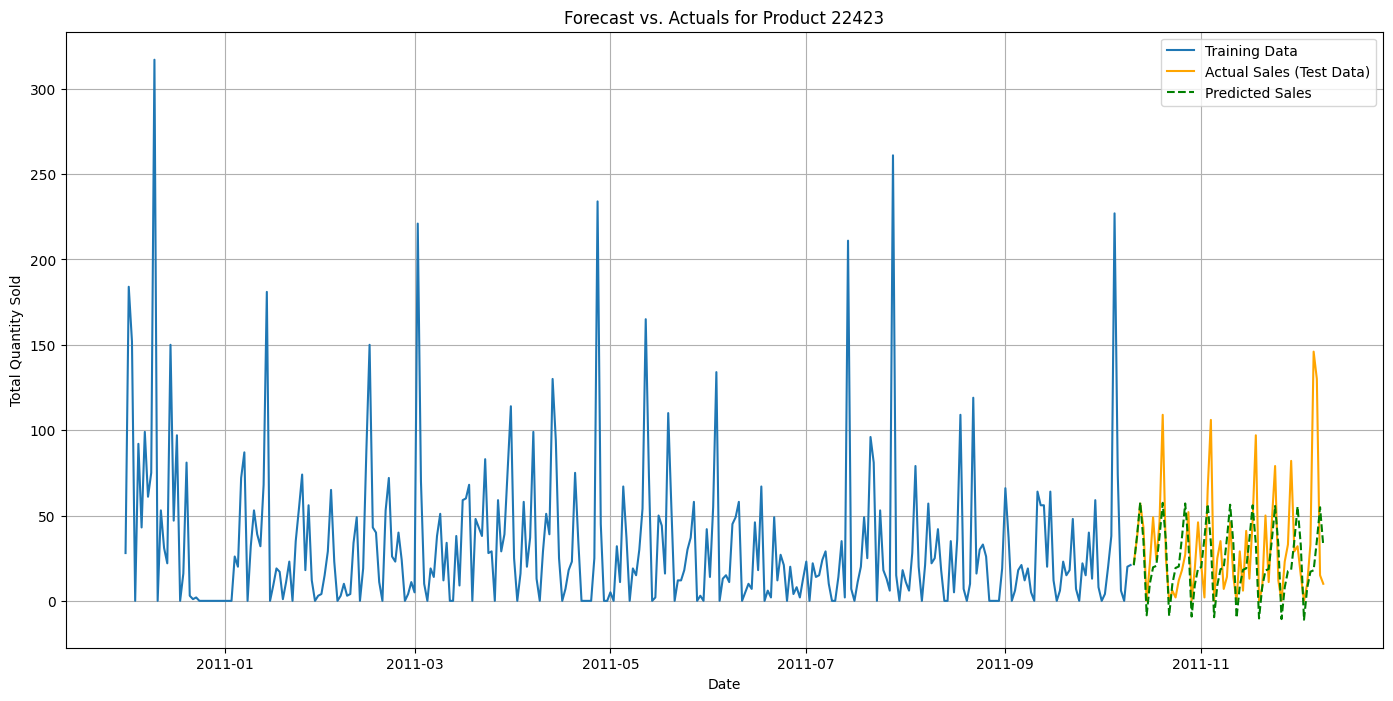


--- Forecast Performance Metrics ---
Root Mean Squared Error (RMSE): 30.74
Mean Absolute Percentage Error (MAPE): 585998727130277376.00%

(MAPE means that, on average, our forecast is off by this percentage.)


In [43]:
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# --- 1. Train-Test Split ---
# We'll use the last 60 days for testing
train_data = ts_daily[:-60]
test_data = ts_daily[-60:]

print(f"Training data runs from {train_data.index.min()} to {train_data.index.max()}")
print(f"Testing data runs from {test_data.index.min()} to {test_data.index.max()}")


# --- 2. Build and Train the Model ---
# We use Holt-Winters' Exponential Smoothing.
# 'add' for additive trend, 'add' for additive seasonality, m=7 for a weekly seasonal pattern.
# 'seasonal_periods=7' is a good assumption for retail data (weekly cycle).
model = ExponentialSmoothing(
    train_data,
    seasonal='add',
    seasonal_periods=7,
    trend='add',
    initialization_method="estimated"
).fit()

print("\nModel training complete.")


# --- 3. Make Predictions ---
# Forecast for the same period as our test data (60 days)
predictions = model.forecast(len(test_data))


# --- 4. Evaluate the Model ---
# Visualize the forecast against the actual sales
plt.figure(figsize=(17, 8))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Sales (Test Data)', color='orange')
plt.plot(predictions.index, predictions, label='Predicted Sales', color='green', linestyle='--')

plt.title(f'Forecast vs. Actuals for Product {PRODUCT_TO_FORECAST}')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.legend()
plt.grid(True)
plt.show()

# Calculate performance metrics
rmse = np.sqrt(mean_squared_error(test_data, predictions))
mape = mean_absolute_percentage_error(test_data, predictions)

print("\n--- Forecast Performance Metrics ---")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2%}")
print("\n(MAPE means that, on average, our forecast is off by this percentage.)")

In [44]:
from sklearn.metrics import mean_absolute_error

# --- Recalculating with better metrics ---

# 1. Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae:.2f} units")
print("(This means, on an average day, our forecast is off by about this many units sold.)")


# 2. Calculate a 'Corrected' MAPE by ignoring days with zero sales
# Create a temporary dataframe to align actuals and predictions
eval_df = pd.DataFrame({'Actuals': test_data, 'Predictions': predictions})
# Filter out rows where actual sales were zero
eval_df_no_zeros = eval_df[eval_df['Actuals'] > 0]

corrected_mape = mean_absolute_percentage_error(eval_df_no_zeros['Actuals'], eval_df_no_zeros['Predictions'])

print(f"\nCorrected MAPE (on non-zero days only): {corrected_mape:.2%}")

Mean Absolute Error (MAE): 20.68 units
(This means, on an average day, our forecast is off by about this many units sold.)

Corrected MAPE (on non-zero days only): 118.10%


In [20]:
print(f"Average daily sales for this product: {ts_daily.mean():.2f} units")

Average daily sales for this product: 33.09 units


--- Building XGBoost Model (User Corrected API) ---
Training data shape: (308, 7)
Testing data shape: (59, 7)
Model object created. Starting training...
Model training complete.

--- XGBoost Forecast Performance ---
Exponential Smoothing MAE: 20.68
XGBoost Model MAE: 21.80


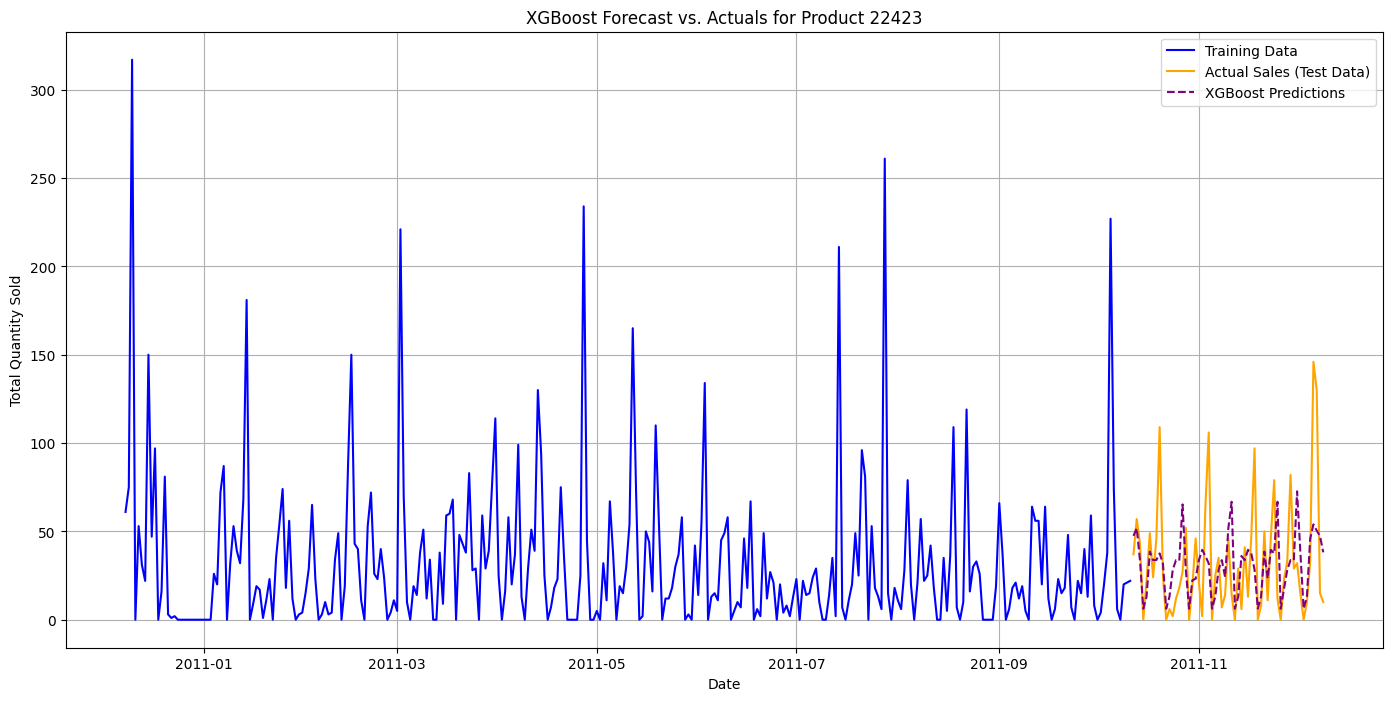

In [45]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Feature Engineering ---
def create_features(df):
    """
    Creates time series features from a datetime index.
    """
    df = df.copy()
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['weekofyear'] = df.index.isocalendar().week.astype(int)
    return df

features_df = create_features(ts_daily.to_frame(name='Quantity'))

# --- 2. Lag Features ---
features_df['lag_7'] = features_df['Quantity'].shift(7)
features_df = features_df.dropna()

# --- 3. Train-Test Split ---
split_date = features_df.index.max() - pd.DateOffset(days=59)
train_df = features_df.loc[features_df.index <= split_date]
test_df = features_df.loc[features_df.index > split_date]

X_train = train_df.drop('Quantity', axis=1)
y_train = train_df['Quantity']
X_test = test_df.drop('Quantity', axis=1)
y_test = test_df['Quantity']

print("--- Building XGBoost Model (User Corrected API) ---")
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

# --- 4. Build and Train the XGBoost Model (Corrected per your diagnosis) ---
# The callbacks parameter is now correctly placed in the constructor
reg = xgb.XGBRegressor(
    n_estimators=1000,
    objective='reg:squarederror',
    callbacks=[xgb.callback.EarlyStopping(rounds=50)]  # Your fix is here
)

print("Model object created. Starting training...")

# The .fit() method now only takes the data and eval_set
reg.fit(
    X_train, 
    y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=False
)

print("Model training complete.")

# --- 5. Make Predictions and Evaluate ---
predictions_xgb = reg.predict(X_test)
mae_xgb = mean_absolute_error(y_test, predictions_xgb)

print("\n--- XGBoost Forecast Performance ---")
print(f"Exponential Smoothing MAE: 20.68")
print(f"XGBoost Model MAE: {mae_xgb:.2f}")

# --- 6. Visualize the Forecast ---
test_df_plot = test_df.copy()
test_df_plot['Prediction'] = predictions_xgb

plt.figure(figsize=(17, 8))
plt.plot(train_df.index, train_df['Quantity'], label='Training Data', color='blue')
plt.plot(test_df_plot.index, test_df_plot['Quantity'], label='Actual Sales (Test Data)', color='orange')
plt.plot(test_df_plot.index, test_df_plot['Prediction'], label='XGBoost Predictions', color='purple', linestyle='--')

plt.title(f'XGBoost Forecast vs. Actuals for Product {PRODUCT_TO_FORECAST}')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
# --- Baseline Model Comparison ---
# Baseline 1: Naive Forecast (predict today's sales will be the same as yesterday's)
naive_predictions = test_data.shift(1).fillna(0) # shift data by 1 day
mae_naive = mean_absolute_error(test_data, naive_predictions)

# Baseline 2: Mean Prediction (always predict the average of the training data)
mean_prediction = train_data.mean()
mean_predictions = pd.Series([mean_prediction] * len(test_data), index=test_data.index)
mae_mean = mean_absolute_error(test_data, mean_predictions)

print("--- Baseline Performance ---")
print(f"Naive Forecast MAE: {mae_naive:.2f}")
print(f"Mean Forecast MAE: {mae_mean:.2f}")
print(f"\nOur Exponential Smoothing Model MAE: 20.68")

--- Baseline Performance ---
Naive Forecast MAE: 32.10
Mean Forecast MAE: 24.48

Our Exponential Smoothing Model MAE: 20.68
